# Attribute Information

# Import Required packges

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('day.csv',index_col='instant')

In [3]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# drop dependant and date column

In [4]:
df.drop(['dteday','casual','cnt'],axis=1,inplace=True)

# shape of data

In [5]:
df.shape

(731, 12)

# basic info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  registered  731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.2 KB


# basic statistics

In [7]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,3656.172367
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1560.256377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,20.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,2497.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,3662.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,4776.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,6946.000000


In [8]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.411623
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.594248
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.293488
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.108745
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.057367
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.303907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.260388
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.540012
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.544192
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.091089


<AxesSubplot:>

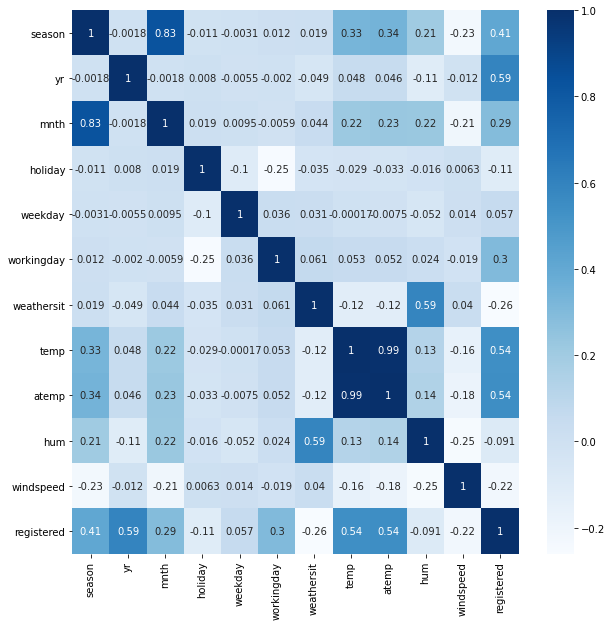

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# Exploratory data analysis

<AxesSubplot:xlabel='season'>

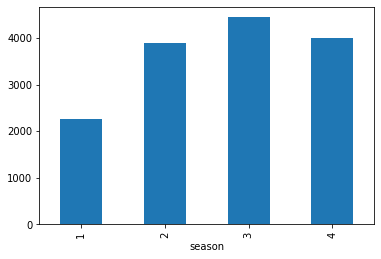

In [10]:
df.groupby('season')['registered'].mean().plot(kind='bar')

<AxesSubplot:xlabel='season', ylabel='registered'>

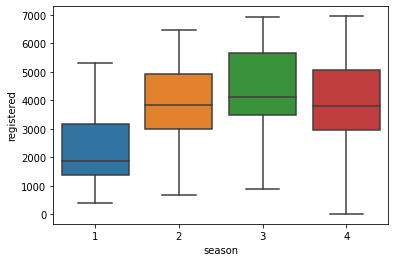

In [11]:
sns.boxplot(df['season'], df['registered'])

<AxesSubplot:xlabel='mnth', ylabel='registered'>

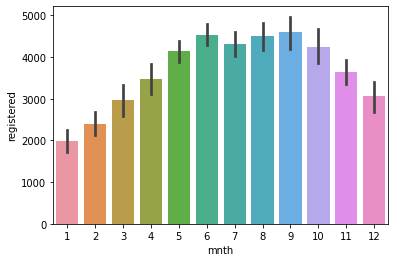

In [12]:
sns.barplot(df['mnth'],df['registered'])

In [13]:
#Numerical Variables
num_var = df[['temp','atemp','hum','windspeed','registered']]

#catogarical variables
cat_var = df.drop(['temp','atemp','hum','windspeed','registered'], axis=1)

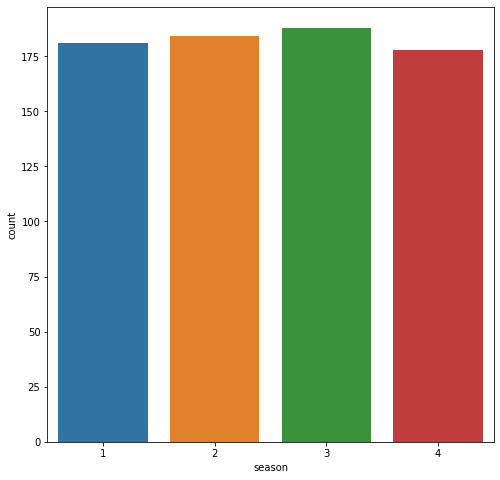

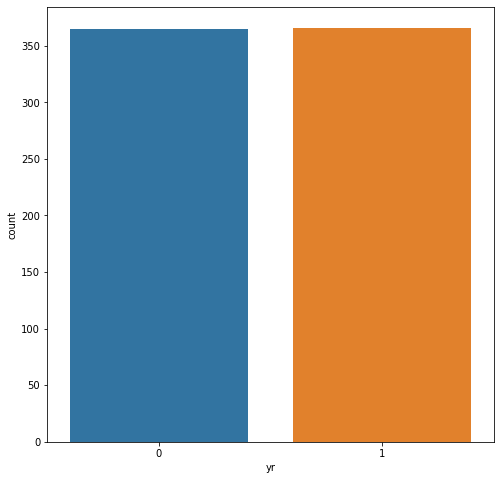

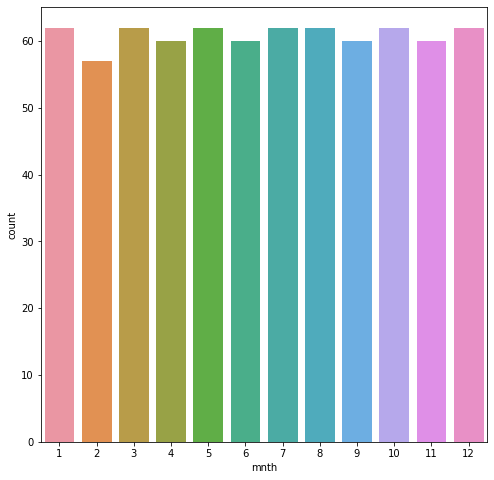

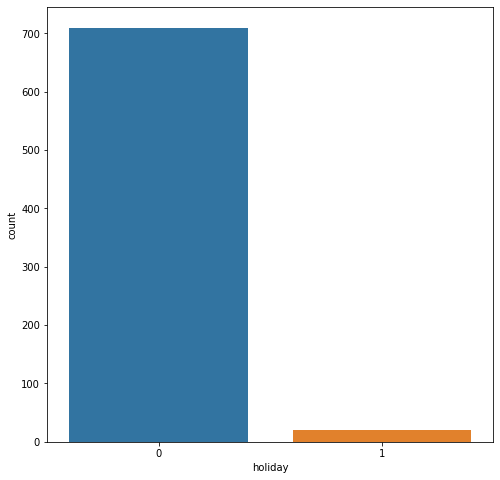

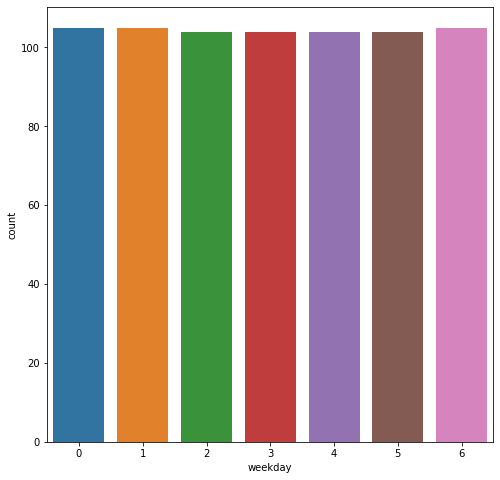

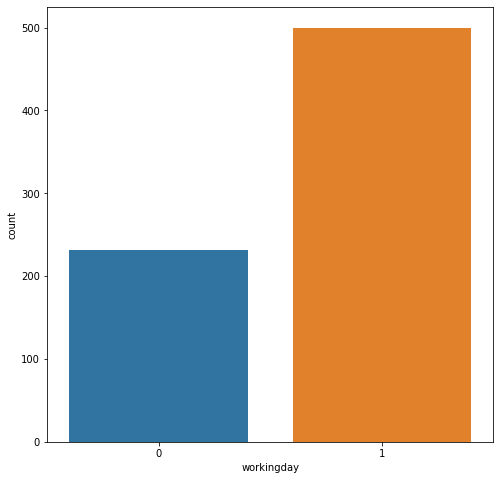

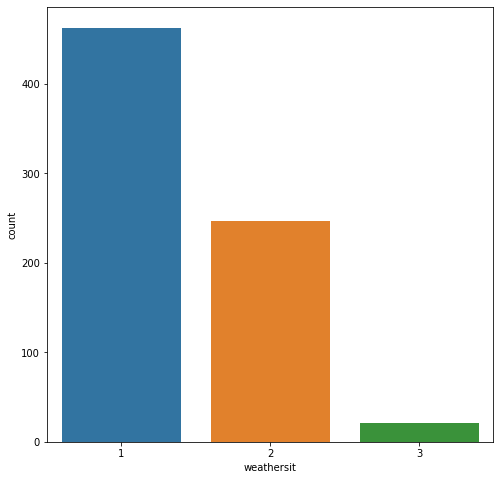

In [14]:

#Plotting Bar chart for all the categorical variables
for i in list(cat_var.columns):
    plt.figure(figsize=(8,8))
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.show()

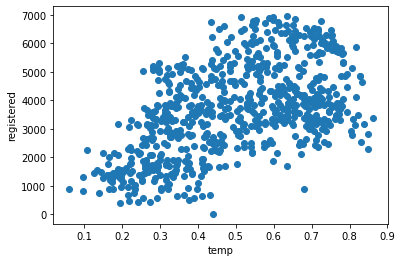

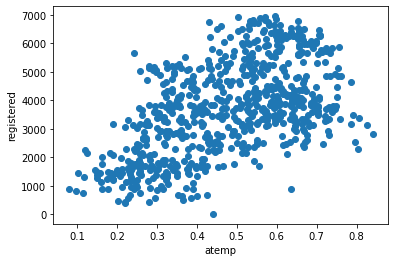

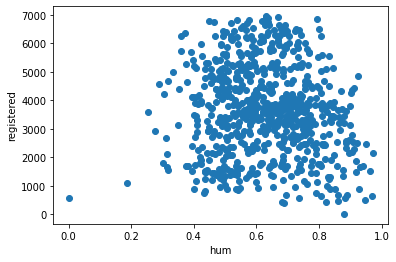

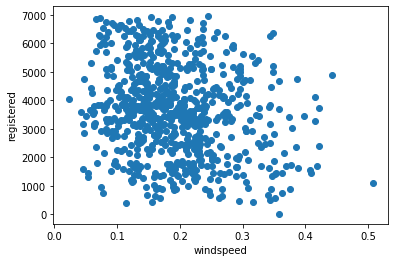

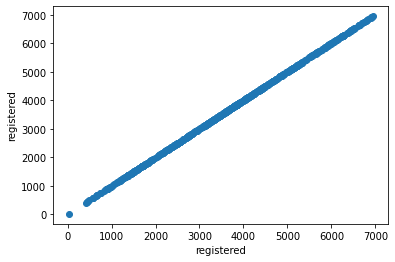

In [15]:
for i in list(num_var.columns):
    plt.scatter(df[i],df['registered'])
    plt.xlabel(i)
    plt.ylabel('registered')
    plt.show()

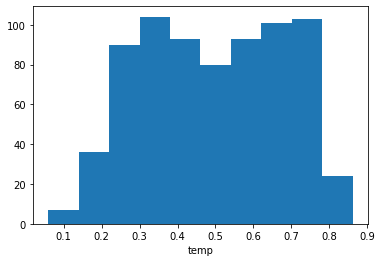

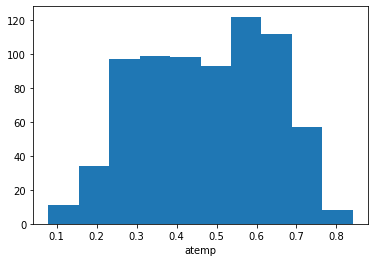

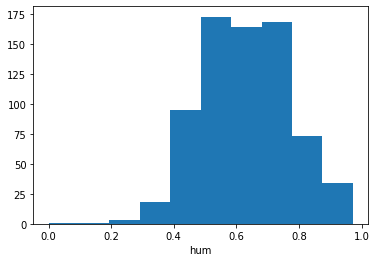

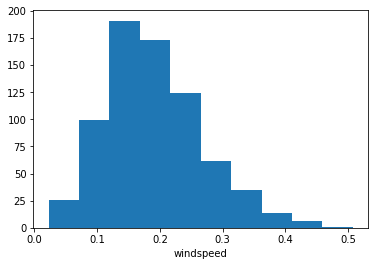

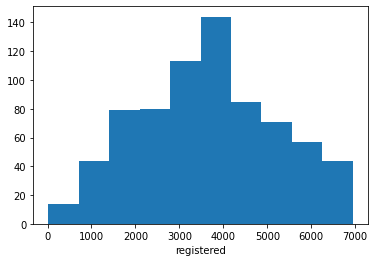

In [16]:
for i in list(num_var.columns):
    plt.hist(num_var[i])
    plt.xlabel(i)
    plt.show()

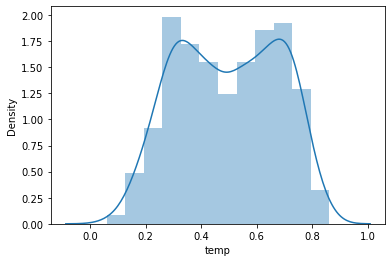

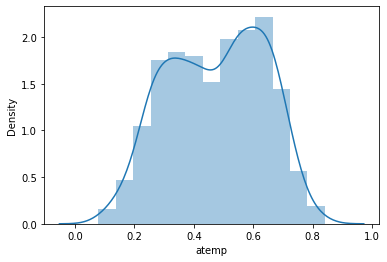

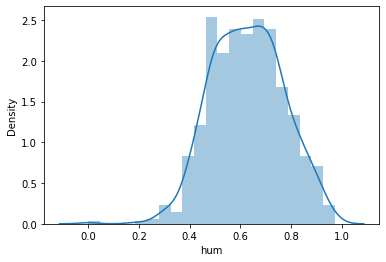

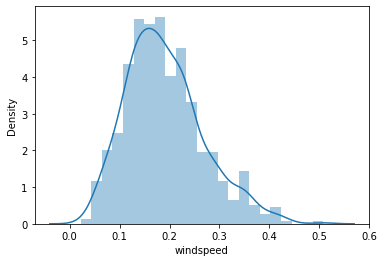

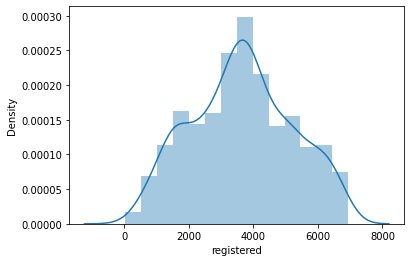

In [17]:
for i in list(num_var.columns):
    sns.distplot(df[i])
    plt.show()

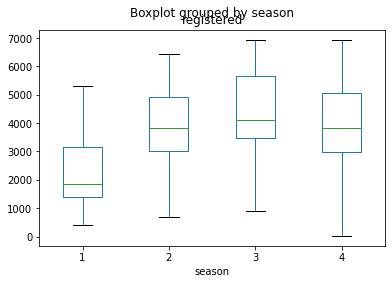

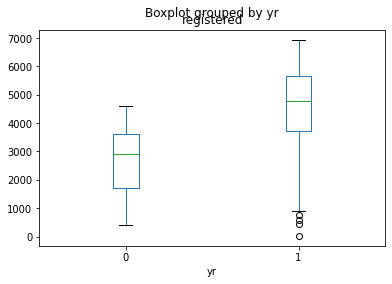

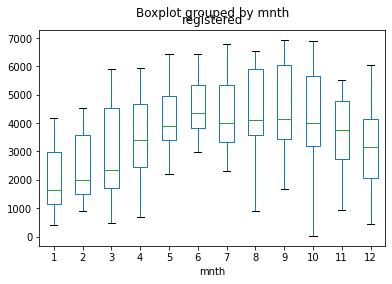

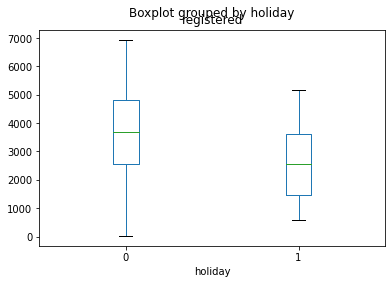

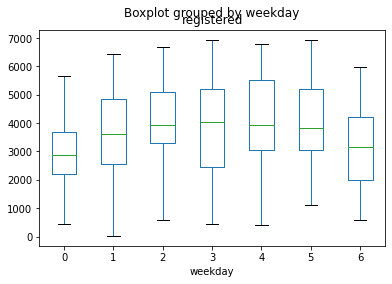

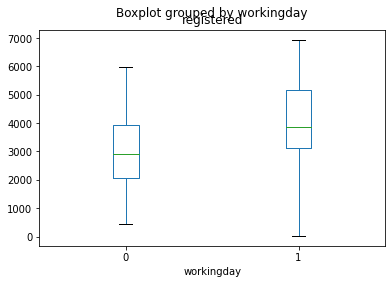

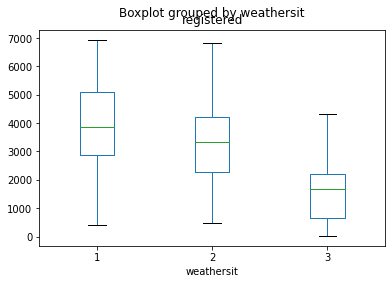

In [18]:
for i in cat_var:
    df.boxplot(column='registered', by=i,grid=False)
    print('\n\n')
    plt.show()

# create independent and dependant variable

In [19]:
x=df.drop('registered',axis=1)
y=df['registered']

# split data into train_test_

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((511, 11), (220, 11), (511,), (220,))

# try differnt algorithms

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



In [57]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random_forest':RandomForestRegressor(),
    "KNN":KNeighborsRegressor()
}

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import BaggingRegressor
for name, model in models.items():
    model=model.fit(x_train,y_train)
    model.score(x_test,y_test)
    y_pred=model.predict(x_test)
    print(f"The score of {name} is: {model.score(x_test,y_test)}")
    print(f"MSE of {name} is: {mean_squared_error(y_test,y_pred)}")
    print(f"MAE of {name} is: {mean_absolute_error(y_test,y_pred)}")
    print(f"RMSE of {name} is: {np.sqrt(mean_squared_error(y_test,y_pred))}\n")
    

The score of LinearRegression is: 0.8216906944224138
MSE of LinearRegression is: 472169.6016108897
MAE of LinearRegression is: 507.734770060419
RMSE of LinearRegression is: 687.1459827510379

The score of Ridge is: 0.822728658263521
MSE of Ridge is: 469421.03517037455
MAE of Ridge is: 509.96166232012297
RMSE of Ridge is: 685.1430764230013

The score of Lasso is: 0.8224409773951102
MSE of Lasso is: 470182.82469441876
MAE of Lasso is: 510.0729804134959
RMSE of Lasso is: 685.698785688307

The score of DecisionTree is: 0.8110187563160376
MSE of DecisionTree is: 500429.2863636364
MAE of DecisionTree is: 468.17727272727274
RMSE of DecisionTree is: 707.4102673580843

The score of Random_forest is: 0.8873109033057155
MSE of Random_forest is: 298404.87415772735
MAE of Random_forest is: 352.65695454545454
RMSE of Random_forest is: 546.2644727215264

The score of KNN is: 0.7453051306444969
MSE of KNN is: 674441.3849090909
MAE of KNN is: 594.8318181818182
RMSE of KNN is: 821.2438035742437



# Apply randomforest regressor

In [59]:
model=RandomForestRegressor().fit(x_train,y_train)

In [53]:
y_pred=model.predict(x_test)

# Model_Evaluation

In [26]:
model.score(x_test,y_test)

0.892858462342553

In [46]:
print(f"The score  is: {model.score(x_test,y_test)}")
print(f"MSE is: {mean_squared_error(y_test,y_pred)}")
print(f"MAE is: {mean_absolute_error(y_test,y_pred)}")
print(f"RMSE  is: {np.sqrt(mean_squared_error(y_test,y_pred))}\n")

The score  is: 0.892858462342553
MSE is: 243764.88517590903
MAE is: 354.1639545454545
RMSE  is: 493.72551602677885



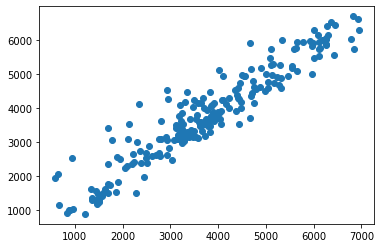

In [45]:
plt.scatter(y_test,y_pred)

# Apply kfold and cross val score

In [42]:
from sklearn.model_selection import KFold,cross_val_score
cv=KFold(n_splits=10)
score=cross_val_score(model,x_test,y_test,cv=cv)

In [43]:
score

array([0.84012433, 0.95125132, 0.82559041, 0.73297895, 0.87968362,
       0.52783611, 0.89355887, 0.93001277, 0.82769421, 0.80763079])